In [1]:
import os
import datetime
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import toml

CONFIG = toml.load(os.getenv('ENV', 'development') + '.toml')
CURRENCYBEACON_API_KEY = CONFIG['akshare']['CURRENCYBEACON_API_KEY']

/home/kevin/.local/share/virtualenvs/smart_invest-xPidyKnR/lib/python3.8/site-packages/akshare/__init__.py:2997: UserWarning: 为了支持更多特性，请将 Python 升级到 3.9.0 及以上版本！
  warnings.warn(


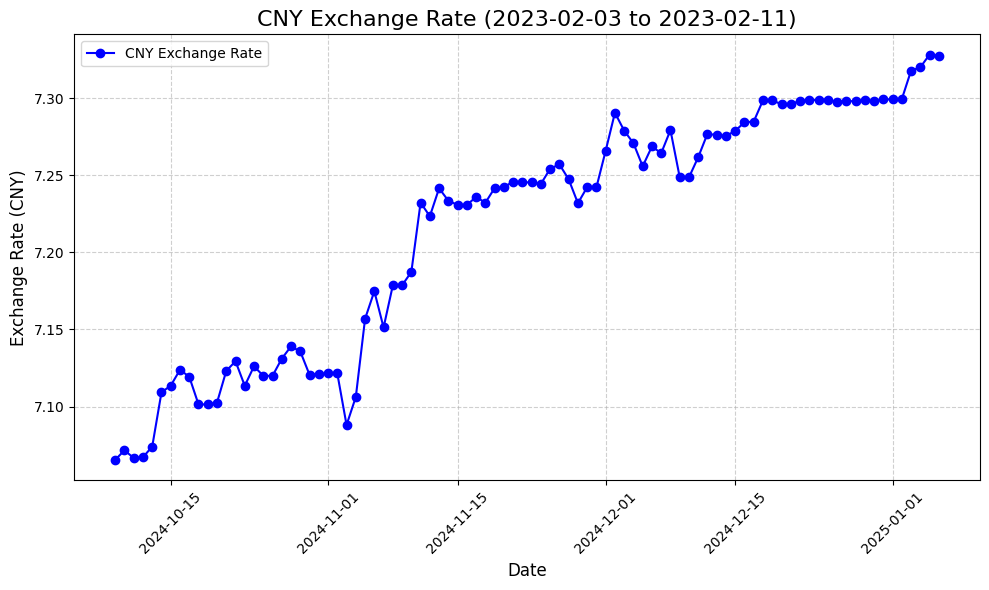

In [2]:

today = datetime.datetime.today()
start_date = (today-datetime.timedelta(days=90)).strftime("%F")
end_date = today.strftime("%F")
currency_latest_df = ak.currency_time_series(base="USD", symbols="CNY", start_date=start_date, end_date=end_date, api_key= CURRENCYBEACON_API_KEY)

currency_latest_df["date"] = pd.to_datetime(currency_latest_df["date"])
currency_latest_df.set_index("date", inplace=True)

# 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图像大小
plt.plot(currency_latest_df.index, currency_latest_df["CNY"], marker="o", linestyle="-", color="b", label="CNY Exchange Rate")
# 添加标题和标签
plt.title("CNY Exchange Rate (2023-02-03 to 2023-02-11)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Exchange Rate (CNY)", fontsize=12)
# 添加网格
plt.grid(True, linestyle="--", alpha=0.6)

# 添加图例
plt.legend()

# 旋转日期标签
plt.xticks(rotation=45)
# 显示图像
plt.tight_layout()  # 调整布局
# plt.show()

# 保存图像
plt.savefig("plot.png", dpi=300)


In [ ]:
import datetime

# sz001696 宗申动力
# 沪深300 上海交易所 000300 深圳交易所 399300
# 科创50 000688
symbol = 'sh000300'
csv_file = f'{symbol}_stock_data.csv'
today = datetime.datetime.today()
start_date = (today-datetime.timedelta(days=90)).strftime("%Y%m%d")
end_date = today.strftime("%Y%m%d")
df = ak.stock_zh_index_daily_em(symbol=symbol, start_date=start_date, end_date=end_date)
df.to_csv(csv_file, index=False)
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)
# mpf.plot(df, type='candle', volume=True, style='charles', title='Stock candle trend chart', ylabel='price', ylabel_lower='trading volume')


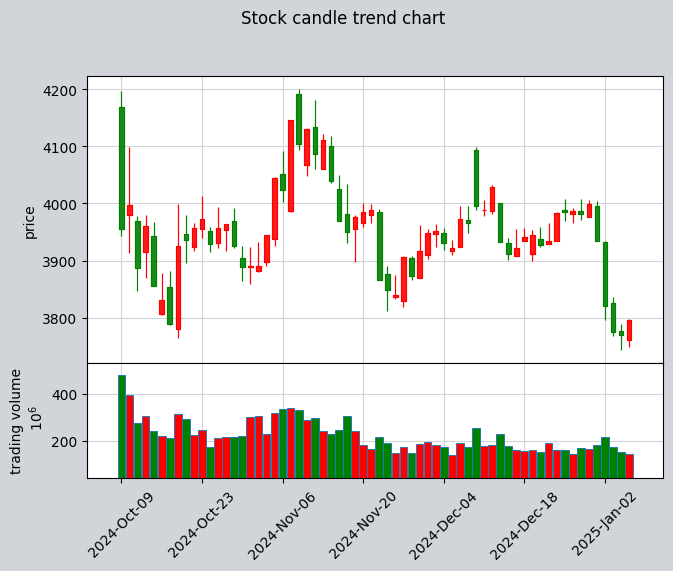

In [21]:
df = pd.read_csv(csv_file)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# 自定义风格
my_color = mpf.make_marketcolors(up='r',
                                 down='g',
                                 edge='inherit',
                                 wick='inherit',
                                 volume='inherit')
# 设置图表的背景色
my_style = mpf.make_mpf_style(marketcolors=my_color,
                              figcolor='(0.82, 0.83, 0.85)',
                              gridcolor='(0.82, 0.83, 0.85)')
mpf.plot(df, type='candle', volume=True, style=my_style, title='Stock candle trend chart', ylabel='price', ylabel_lower='trading volume')